# Analysis of reorientation events (change in heading relative to landmark) in two-object forest conditioning paradigm
### Generate a minimal projection of the trajectory in the two-object forest.
Small triangle defined by one cone, one cylinder and the center of a square defined by two cones and two cylinders.

### Identitfy reorientation events (~ turns in 1D).

### Compute maps of the reorientation events as a function of the position in the VR where they occur. 


In [1]:
__author__ = 'Hannah Haberkern, hjmhaberkern@gmail.com'

import numpy as np
import pandas as pd
    
from os import mkdir, walk, getcwd
from os.path import sep
from sys import path, exit
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from Tkinter import Tk
from tkFileDialog import askdirectory, askopenfilename

# Set path to analysis code directory
codeDir = sep.join(getcwd().split(sep)[:-2])
path.insert(1, codeDir)

from plottingUtilities.basicPlotting import myAxisTheme,_myAccentList


# Choose files to analyse ..............................................................................................

baseDir = '/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto'

root = Tk()
root.withdraw()
# choose experiment folder
dataDir = askdirectory(initialdir=baseDir,
                       title='Select experiment directory (containing directories for multiple flies)') + sep
root.update()
root.destroy()
expDirs = sorted(walk(dataDir).next()[1])

analysisDir = sep.join(dataDir.split(sep)[:-2]) + sep + 'analysis' + sep

try:
    expDirs.remove('virtualWorld')
except:
    print('You selected an invalid data directory.\n' +
          'Expected folder structure of the selected path is some/path/to/experimentName/flyGender/rawData/')
    exit(1)

print('\n Analysing the following folders:\n')
print(expDirs)


 Analysing the following folders:

['m01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07', 'm08', 'm09', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16', 'm17', 'm18', 'm19', 'm20', 'm21', 'm22', 'm23', 'm24', 'm25']


In [2]:
expDirs=expDirs[:]
print(expDirs)

['m01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07', 'm08', 'm09', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16', 'm17', 'm18', 'm19', 'm20', 'm21', 'm22', 'm23', 'm24', 'm25']


In [3]:
# Uncomment, if you want to select a specific subset of flies (e.g. good learners..)
#from operator import itemgetter
#my_indices = [7,8,9,10]#[0,2,4,6,7,8,9,10,11,12]
#expDirs = itemgetter(*my_indices)(expDirs)

selectionTag = ''  # chose small string, to specify dataset (e.g. top5 flies)

In [4]:
%matplotlib inline 

### Compose mutli-fly data into dataframe

In [5]:
# generate fly color map
numFlies = len(expDirs)
cNorm  = colors.Normalize(vmin=0, vmax=numFlies)

mycmap = colors.LinearSegmentedColormap.from_list('myAccent',_myAccentList, N=256, gamma=1.0)
flyCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=mycmap)

In [6]:
expDir = dataDir + expDirs[0] + sep
FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]

In [7]:
keylist = ['headingAngle','rotVelo','time','transVelo',
           'xPos','xPosInMiniarena','yPos','yPosInMiniarena','rEvents']

keylistLong = ['flyID','trial','trialtype','reinforcement','starvation','moving'] + keylist
FOAllFlies_df = pd.DataFrame(data=np.zeros((0,len(keylistLong))), columns=keylistLong)

nTrialsPr = 0
nTrialsTr = 0
nTrialsPo = 0
 
vTransTH = 2 #mm/s

# Go through directories of experiments with different flies ...............................................
for currExpDir in expDirs:

    expDir = dataDir + currExpDir + sep
    print('\n Analysing the following folder:\n')
    print(expDir)

    FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]
    FODataFiles = sorted(FODataFiles)

    print('\n Analysing the following log files:\n')
    print(FODataFiles)

    # Run single trial analysis on each file in folder .....................................................
    for fileToAnalyse in FODataFiles:
        
        flyID = fileToAnalyse.split('_')[8]
        genotype = fileToAnalyse.split('_')[6]
        starvation = fileToAnalyse.split('_')[5]
        trial = FODataFiles.index(fileToAnalyse) + 1
       
        print('Loading saved *.npy file.')
        FODatLoad = np.load(expDir + fileToAnalyse[:-3] + 'npy')[()]

        # Split into visible object trials and invisible object trials
        if 'train' in fileToAnalyse:
            trialtype = 'train'
            rZones = 'on'
            nTrialsTr += 1
        elif 'pre' in fileToAnalyse:
            trialtype = 'pre'
            rZones = 'off'
            nTrialsPr += 1
        else:
            trialtype = 'post'
            rZones = 'off'
            nTrialsPo += 1
        
        vTrans = np.copy(FODatLoad['transVelo'])
        moving = vTrans >= vTransTH

        FODatLoad_df = pd.DataFrame.from_dict(FODatLoad,orient='columns')
        FODatLoad_df.insert(0, 'flyID', flyID)
        FODatLoad_df.insert(1, 'trial', trial)
        FODatLoad_df.insert(2, 'trialtype', trialtype)
        FODatLoad_df.insert(3, 'reinforcement', rZones)
        FODatLoad_df.insert(4, 'starvation', int(starvation[:-1]))
        FODatLoad_df.insert(5, 'moving', moving)
        
        FOAllFlies_df = FOAllFlies_df.append(FODatLoad_df)


 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m01/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_post_out_161126171710.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_pre_out_161126164545.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_5h_10xChrR-HC-Ret_10bl_m01_train_out_161126165636.txt']
Loading saved *.npy file.
Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m02/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_6h_10xChrR-HC-Ret_10bl_m02_post_out_161126181113.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_8d_6h_10xChrR-HC-Ret_10bl_m

Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m15/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_post_out_161209212359.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_pre_out_161209205248.txt', 'twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_9d_10h_10xChrR-HC-Ret_10bl_m15_train_out_161209210316.txt']
Loading saved *.npy file.
Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/twoObjOpto/HC_x_10xChrimsonR/baseline10/antiCyli/male/rawData/m16/

 Analysing the following log files:

['twoObjectForest_1cm4cmConez1_08cm3cmCyliz2R_6cmGrid_6-8d_7h_10xChrR-HC-Ret_10bl_m16_post_out_170131223624.txt', 'twoObjectForest_1cm4cm

In [8]:
FOAllFlies_df = FOAllFlies_df[keylistLong]

FOAllFlies_df['flyID'] = FOAllFlies_df['flyID'].astype('category')
FOAllFlies_df['trial'] = FOAllFlies_df['trial'].astype('category')
FOAllFlies_df['trialtype'] = FOAllFlies_df['trialtype'].astype('category')
FOAllFlies_df['reinforcement'] = FOAllFlies_df['reinforcement'].astype('category')

FOAllFlies_df 

,flyID,trial,trialtype,reinforcement,starvation,moving,headingAngle,rotVelo,time,transVelo,xPos,xPosInMiniarena,yPos,yPosInMiniarena,rEvents
0,m01,1.0,post,off,5.0,0.0,-0.000004,0.000000,0.000000,0.000000,60.622000,60.622000,35.000000,35.000000,10.0
1,m01,1.0,post,off,5.0,0.0,-0.000004,0.235672,0.050005,0.793497,60.622000,60.622000,35.000000,35.000000,10.0
2,m01,1.0,post,off,5.0,0.0,0.011781,0.157064,0.100010,1.588667,60.591600,60.591600,34.974500,34.974500,10.0
3,m01,1.0,post,off,5.0,1.0,0.019635,-1.570639,0.150015,3.968839,60.531108,60.531108,34.923006,34.923006,10.0
4,m01,1.0,post,off,5.0,1.0,-0.058905,-3.298343,0.200020,4.234325,60.375600,60.375600,34.799700,34.799700,10.0
5,m01,1.0,post,off,5.0,1.0,-0.223838,-4.083662,0.250025,4.020724,60.176300,60.176300,34.728200,34.728200,10.0
6,m01,1.0,post,off,5.0,1.0,-0.428042,-4.633386,0.300030,5.723641,60.027292,60.027292,34.593218,34.593218,10.0
7,m01,1.0,post,off,5.0,1.0,-0.659734,-6.360670,0.350035,7.959486,59.894795,59.894795,34.339523,34.339523,10.0
8,m01,1.0,post,off,5.0,1.0,-0.977800,-4.947933,0.400040,10.639741,59.656903,59.656903,34.020426,34.020426,10.0
9,m01,1.0,post,off,5.0,1.0,-1.225221,-4.868982,0.450045,10.611614,59.553296,59.553296,33.498572,33.498572,10.0


In [9]:
keyind_xPos = keylistLong.index('xPosInMiniarena')
keyind_yPos = keylistLong.index('yPosInMiniarena')
keyind_mov = keylistLong.index('moving')
keyind_fly = keylistLong.index('flyID')
keyind_vT = keylistLong.index('transVelo')
keyind_ang = keylistLong.index('headingAngle')
keyind_t = keylistLong.index('time')
keyind_vR = keylistLong.index('rotVelo')
keyind_EV = keylistLong.index('rEvents')

flyIDallarray = np.asarray(FOAllFlies_df.iloc[:,keyind_fly:keyind_fly+1]).squeeze()
flyIDs = sorted(list(set(flyIDallarray.tolist())))

### Define structure of trials in terms of closed-loop optogenetic stimulation and presence of landmark cues

In [10]:
# Two object reinforcement test
rZoneState = ['off','on','off']
visibilityState = ['visible','visible','visible']
groundPlane = ['texture','texture','texture']
trialName = ['pre','train','post']
gridSize = 60.0

coneColor = 'mediumseagreen'
cyliColor = 'mediumorchid'

In [13]:
# Settings for boxplots of all three trials:

objtypeNames = ['Cone','Cylinder']

objBoxColors = [['lightgreen','seagreen','mediumseagreen'],
                ['palevioletred','darkmagenta','mediumorchid']] #for spec. objects
BoxColors = ['grey','slateblue','royalblue'] # for ratio between objects

trialColors = ['darkseagreen', 'darkviolet','teal']
trialMarkers = ['d','*','o']

In [11]:
visitRad = 15

coneCoords = [[gridSize/2, gridSize/2],
              [3*gridSize/2, -gridSize/2]]
cyliCoords = [[gridSize/2, -gridSize/2],
              [3*gridSize/2, gridSize/2]]

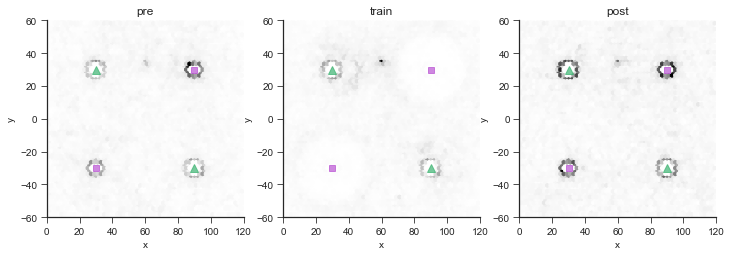

In [12]:
# plot parameter
numBins = 60

hexplotfig = plt.figure(figsize=(12,4))
for trial, condition in enumerate(trialName):
    querystring = '(trialtype == "' + condition + '") & (moving > 0)'
    xPosMA = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
    yPosMA = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
    ax = hexplotfig.add_subplot(1,len(trialName),trial+1)
    ax.hexbin(xPosMA, yPosMA, gridsize=numBins, cmap='Greys')
    plt.xlabel('x'); plt.ylabel('y')
    
    ax.plot(gridSize/2, -gridSize/2, marker='s', markersize=6, alpha=0.7, color=cyliColor)
    ax.plot(gridSize/2, gridSize/2, marker='^', markersize=8, alpha=0.7, color=coneColor)
    ax.plot(3*gridSize/2, -gridSize/2, marker='^', markersize=8, alpha=0.7, color=coneColor)
    ax.plot(3*gridSize/2, gridSize/2, marker='s', markersize=6, alpha=0.7, color=cyliColor)
            
    ax.set_title(trialName[trial])
    ax.set_xlim(0,120)
    ax.set_ylim(-60,60)
    ax.set_aspect('equal')
    myAxisTheme(ax)

## Behaviour at "decision zones": Make 2D maps of "reorientation event" parameters
### (1) Project traces to periodic grid tile
Tile = triangular zone defined by one cone, one cylinder and the center of the square formed by 4 landmarks

In [16]:
FOAllFlies_df.head()

,flyID,trial,trialtype,reinforcement,starvation,moving,headingAngle,rotVelo,time,transVelo,xPos,xPosInMiniarena,yPos,yPosInMiniarena,rEvents
0,m01,1.0,post,off,5.0,0.0,-0.000004,0.000000,0.000000,0.000000,60.622000,60.622000,35.000000,35.000000,10.0
1,m01,1.0,post,off,5.0,0.0,-0.000004,0.235672,0.050005,0.793497,60.622000,60.622000,35.000000,35.000000,10.0
2,m01,1.0,post,off,5.0,0.0,0.011781,0.157064,0.100010,1.588667,60.591600,60.591600,34.974500,34.974500,10.0
3,m01,1.0,post,off,5.0,1.0,0.019635,-1.570639,0.150015,3.968839,60.531108,60.531108,34.923006,34.923006,10.0
4,m01,1.0,post,off,5.0,1.0,-0.058905,-3.298343,0.200020,4.234325,60.375600,60.375600,34.799700,34.799700,10.0


In [28]:
fly = -12

trialtype = 'pre'

if fly<0:
    querystring = '(trialtype=="' + trialtype + '")'
else:
    querystring = '(trialtype=="' + trialtype + '") & (flyID == "'+flyIDs[fly]+'")'
                
print(querystring)
xPosTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_xPos:keyind_xPos+1].values.squeeze()
yPosTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_yPos:keyind_yPos+1].values.squeeze()
headTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_ang:keyind_ang+1].values.squeeze()
timeTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_t:keyind_t+1].values.squeeze()
vtTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_vT:keyind_vT+1].values.squeeze()
vrTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_vR:keyind_vR+1].values.squeeze()
movTrial = FOAllFlies_df.query(querystring).iloc[:, keyind_mov:keyind_mov+1].values.squeeze()

(trialtype=="pre")


In [29]:
def project2triangleTile(x, y, angle, gridSize):
    
    slct = np.arange(0,len(x))#np.logical_and(~np.isnan(x),~np.isnan(y))
    xt = x[slct]
    yt = y[slct]
    anglet = angle[slct]
    
    # (1) cyclic shift of big square ("miniarena")
    yt = (yt + gridSize*1.5)%(gridSize*2)
    
    # (2) cross-project top 2 squares
    leftsquare = np.logical_and(yt > gridSize, xt <= gridSize)
    rightsquare = np.logical_and(yt > gridSize, xt > gridSize)
    
    yt[leftsquare] = yt[leftsquare] - gridSize
    yt[rightsquare] = yt[rightsquare] - gridSize
    
    xt[leftsquare] = xt[leftsquare] + gridSize
    xt[rightsquare] = xt[rightsquare] - gridSize
    
    # (3) flip over the edges of the rectangle parallal to y-axis --> y unchanged, correct heading angle
    tempx = xt.copy()

    xt[tempx < gridSize/2] = abs(gridSize/2 - xt[tempx < gridSize/2]) + gridSize/2
    xt[tempx >= gridSize*1.5] = gridSize*1.5 - abs(gridSize*1.5 - xt[tempx >= gridSize*1.5])
    
    xt = xt - gridSize/2
    
    # recompute angle from flipped vector
    
    #rotate and flip, rotate back
    anglet[tempx < gridSize/2] = -(np.mod(anglet[tempx < gridSize/2] + 1.5*np.pi, 2*np.pi) - np.pi) - 0.5*np.pi
    anglet[tempx >= gridSize*1.5] = -(np.mod(anglet[tempx >= gridSize*1.5] + 1.5*np.pi, 2*np.pi) - np.pi) - 0.5*np.pi

    #correct range
    angrg = anglet < -np.pi
    anglet[np.logical_and(tempx < gridSize/2, angrg)] = \
            anglet[np.logical_and(tempx < gridSize/2, angrg)] + 2*np.pi
    anglet[np.logical_and(tempx >= gridSize*1.5, angrg)] = \
            anglet[np.logical_and(tempx >= gridSize*1.5, angrg)] + 2*np.pi
    
    
    # (4) flip lower triangle onto upper triangle (mirror along y=x diagonal)
    tempx = xt.copy()
    tempy = yt.copy()
    
    xt[tempx > tempy] = tempy[tempx > tempy]
    yt[tempx > tempy] = tempx[tempx > tempy]

    #rotate and flip, rotate back
    anglet[tempx > tempy] = -(np.mod(anglet[tempx > tempy] + 1.75*np.pi, 2*np.pi) - np.pi) - 0.75*np.pi
    
    #correct range
    anglet[np.logical_and(tempx > tempy, anglet < -np.pi)] = \
            anglet[np.logical_and(tempx > tempy, anglet < -np.pi)] + 2*np.pi
        
    
    # (5) flip upper right trianlge onto lower left triangle (mirror along y = -x + gridsize axis)
    tempx = xt.copy()
    tempy = yt.copy()
    
    xt[gridSize - tempx < tempy] = gridSize - tempy[gridSize - tempx < tempy] 
    yt[gridSize - tempx < tempy] = gridSize - tempx[gridSize - tempx < tempy]
    
    # flip parallel to x again before correcting angle
    yt = -yt + gridSize
    anglet = -anglet
    
    #rotate and flip, rotate back
    anglet[gridSize - tempx < tempy] = -(np.mod(anglet[gridSize - tempx < tempy] + 1.75*np.pi, 2*np.pi) - np.pi) - 0.75*np.pi
    
    #correct range
    anglet[np.logical_and(gridSize - tempx < tempy, anglet < -np.pi)] = \
            anglet[np.logical_and(gridSize - tempx < tempy, anglet < -np.pi)] + 2*np.pi
    
    return xt, yt, anglet

In [30]:
xt, yt, anglet = project2triangleTile(xPosTrial,yPosTrial,headTrial, gridSize)

/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less_equal
  if sys.path[0] == '':
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater_equal
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-pack

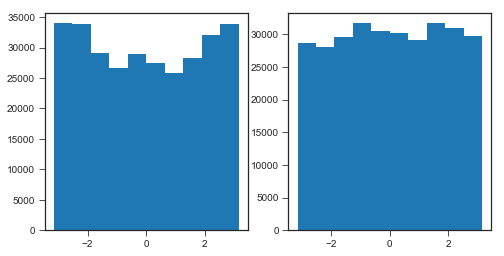

In [31]:
histfig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].hist(anglet[~np.isnan(anglet)])
axs[1].hist(headTrial[~np.isnan(headTrial)]);

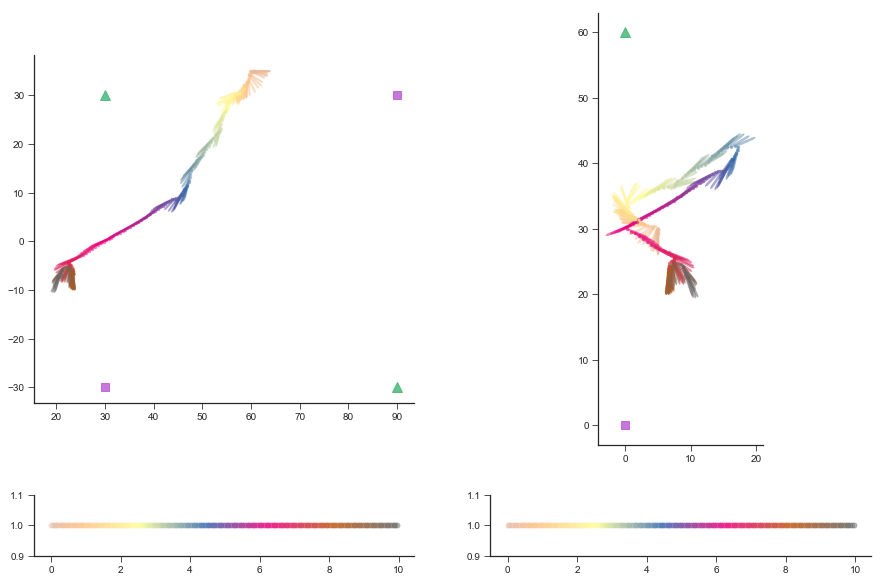

In [32]:
from plottingUtilities.flyTracePlots import plotPosInRange

triangleFig, axs = plt.subplots(2,2,figsize=(15,10),gridspec_kw = {'height_ratios':[7, 1]})

ts = 0
te = 200
arrowScale = 3
alphaValue = 0.4
markerSize = 5

plotPosInRange(axs[0][0], axs[1][0], np.arange(ts,te), timeTrial, xPosTrial, yPosTrial, headTrial,
               'Accent', arrowScale, alphaValue, markerSize)

for obj in range(2):
    axs[0][0].plot(cyliCoords[obj][0], cyliCoords[obj][1], marker='s', markersize=8, alpha=0.8, color=cyliColor)
    axs[0][0].plot(coneCoords[obj][0], coneCoords[obj][1], marker='^', markersize=10, alpha=0.8, color=coneColor)

plotPosInRange(axs[0][1], axs[1][1], np.arange(ts,te), timeTrial, xt, yt, anglet,
               'Accent', arrowScale, alphaValue, markerSize)
axs[0][1].plot(0,0, marker='s', markersize=8, alpha=0.8, color=cyliColor)
axs[0][1].plot(0,gridSize, marker='^', markersize=10, alpha=0.8, color=coneColor)
#axs[0][1].set_xlim(-5, gridSize/2 + 5)
#axs[0][1].set_ylim(-5, gridSize + 5)

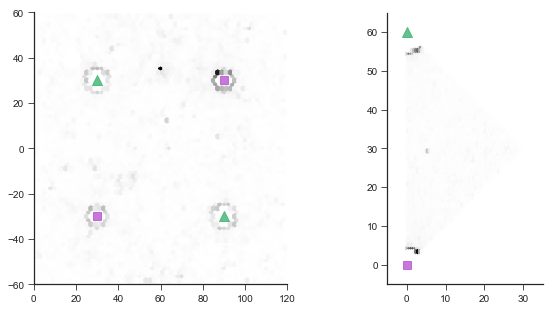

In [33]:
triangleFig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].hexbin(xPosTrial, yPosTrial, gridsize=60, cmap='Greys')
axs[1].hexbin(xt, yt, gridsize=60, cmap='Greys')
for ax in axs:
    myAxisTheme(ax)
    
for obj in range(2):
    axs[0].plot(cyliCoords[obj][0], cyliCoords[obj][1], marker='s', markersize=8, alpha=0.8, color=cyliColor)
    axs[0].plot(coneCoords[obj][0], coneCoords[obj][1], marker='^', markersize=10, alpha=0.8, color=coneColor)

axs[1].plot(0,0, marker='s', markersize=8, alpha=0.8, color=cyliColor)
axs[1].plot(0,gridSize, marker='^', markersize=10, alpha=0.8, color=coneColor)

axs[1].set_xlim(-5, gridSize/2 + 5)
axs[1].set_ylim(-5, gridSize + 5)
axs[1].set_aspect('equal')

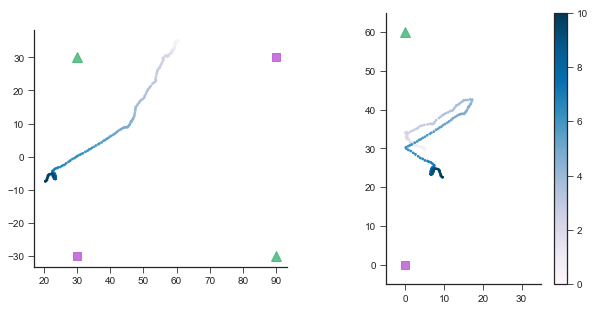

In [34]:
triangleFig, axs = plt.subplots(1,2,figsize=(10,5))

ts = 0
te = 200

sc = axs[0].scatter(xPosTrial[ts:te], yPosTrial[ts:te], s=3, c=timeTrial[ts:te],
                    cmap='PuBu', vmin=timeTrial[ts], vmax=timeTrial[te])
   
for obj in range(2):
    axs[0].plot(cyliCoords[obj][0], cyliCoords[obj][1], marker='s', markersize=8, alpha=0.8, color=cyliColor)
    axs[0].plot(coneCoords[obj][0], coneCoords[obj][1], marker='^', markersize=10, alpha=0.8, color=coneColor)
#cbaxes = triangleFig.add_axes([0.85, 0.12, 0.02, 0.35]) 
cb = plt.colorbar(sc)

sc = axs[1].scatter(xt[ts:te], yt[ts:te], s=3, c=timeTrial[ts:te],
                       cmap='PuBu', vmin=timeTrial[ts], vmax=timeTrial[te])
axs[1].plot(0,0, marker='s', markersize=8, alpha=0.8, color=cyliColor)
axs[1].plot(0,gridSize, marker='^', markersize=10, alpha=0.8, color=coneColor)
axs[1].set_xlim(-5, gridSize/2 + 5)
axs[1].set_ylim(-5, gridSize + 5)

for ax in axs:
        myAxisTheme(ax)
        ax.set_aspect('equal')

/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


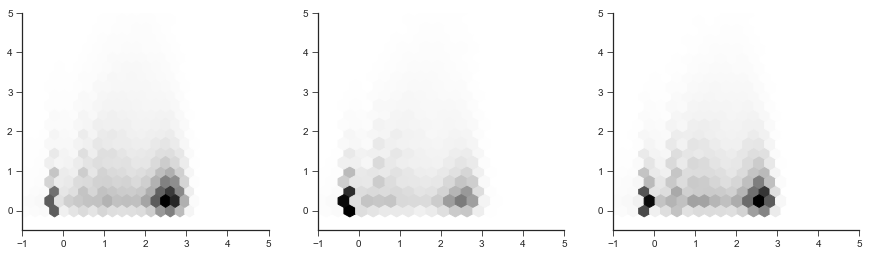

In [369]:
stateFig, axs = plt.subplots(1,3, figsize=(15, 4))

for trial, condition in enumerate(trialName):
    querystring = '(trialtype == "' + condition + '")'
    speed = abs(np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze())
    vR = abs(np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze())
    
    axs[trial].hexbin(np.log(speed), vR, gridsize=(110,130), cmap='Greys')
    axs[trial].set_ylim(-0.5,5)
    axs[trial].set_xlim(-1,5)
    myAxisTheme(axs[trial])

/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


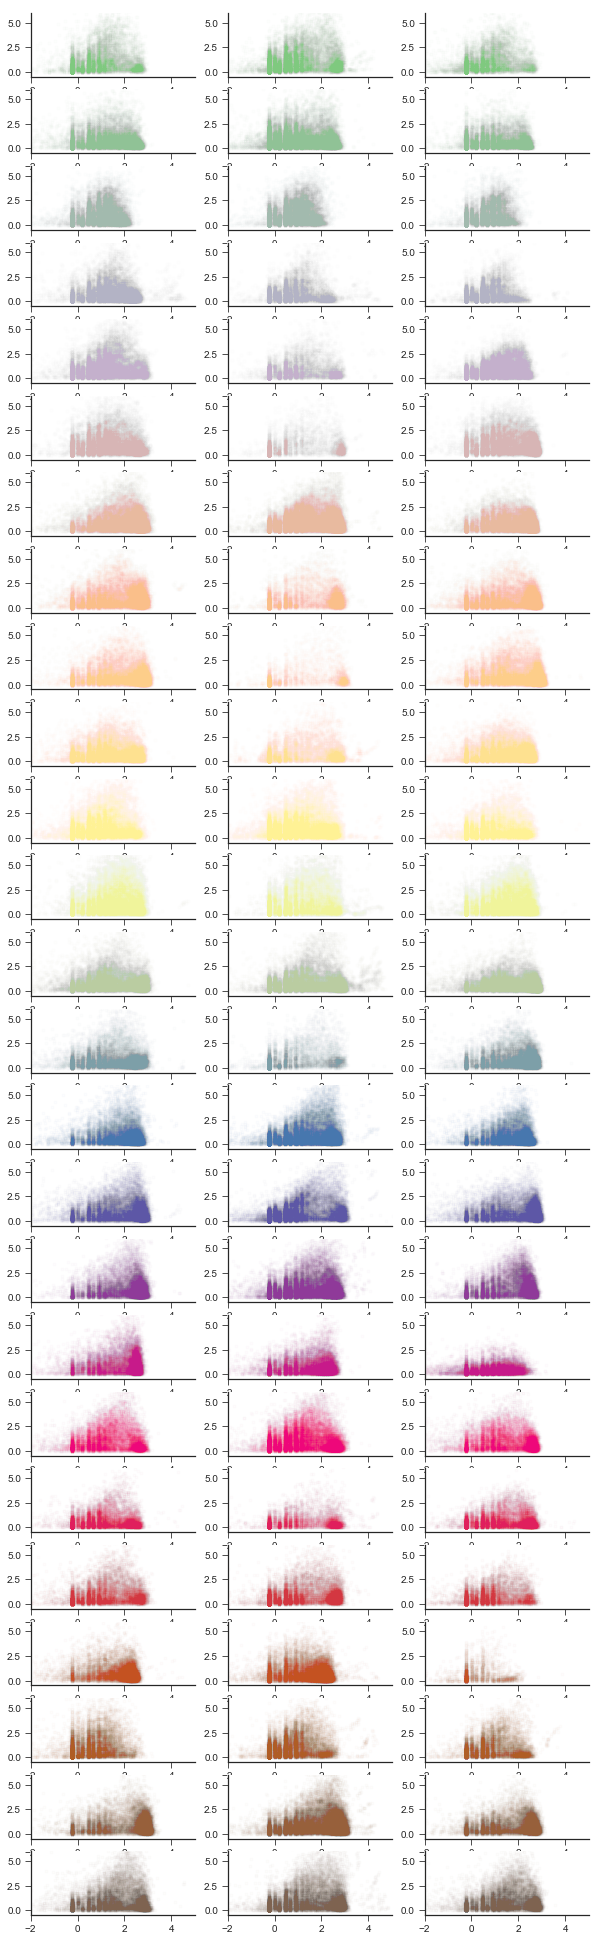

In [374]:
# generate fly color map
numFlies = len(expDirs)
cNorm  = colors.Normalize(vmin=0, vmax=numFlies)

mycmap = colors.LinearSegmentedColormap.from_list('myAccent',_myAccentList, N=256, gamma=1.0)
flyCMap = plt.cm.ScalarMappable(norm=cNorm,cmap=mycmap)

stateFlyFig, axs = plt.subplots(numFlies,3, figsize=(10, 35))

for fly in range(len(flyIDs)):

    for trial, condition in enumerate(trialName):
        querystring = '(trialtype == "' + condition + '" & flyID=="'+flyIDs[fly]+'")'
        speed = abs(np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze())
        vR = abs(np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze())

        axs[fly][trial].plot(np.log(speed), vR, '.', color=flyCMap.to_rgba(fly), alpha=0.01)
        axs[fly][trial].set_ylim(-0.5,6)
        axs[fly][trial].set_xlim(-2,5)
        myAxisTheme(axs[fly][trial])

### (2) Compute rel. heading angle to reference landmark (e.g. cone) -> beta
Note: beta not continuous!

In [42]:
import scipy.stats as sts

In [218]:
# reference landmark coordinates
refLM = (0,0) # (0,0) - cylinder  (0,gridSize) - cone

# convert projected absolute heading angle to vector
head = np.vstack((np.cos(anglet),np.sin(anglet)))

# compute the vector pointing from the fly poistion in the direction of the referene landmark, dirLM, and normalize
dirLM = np.vstack((np.ones(len(xt))*refLM[0] - xt, np.ones(len(xt))*refLM[1] - yt))
norm_dirLM = np.sqrt( np.square(dirLM[0]) + np.square(dirLM[1]) )
dirLM[0] = dirLM[0] / ( np.ones(len(dirLM[0])) * norm_dirLM)
dirLM[1] = dirLM[1] / ( np.ones(len(dirLM[0])) * norm_dirLM)

In [219]:
# compute the inner product of the dirLM . head
ip = ( dirLM[0]*head[0] + dirLM[1]*head[1] ) / \
      ( 1  * np.sqrt( np.square(head[0]) + np.square(head[1]) ) )
    
# compute beta  (currently only positive angle, potentially extend to have full angle)
beta = np.arccos(ip);

#plt.hist(beta[~np.isnan(beta)]);

In [220]:
# alternative to get full angle
beta2 = np.mod(((np.arctan2(head[1], head[0])+np.pi) - (np.arctan2(dirLM[1], dirLM[0])+np.pi)) + np.pi, 2*np.pi) - np.pi

#plt.hist(beta2[~np.isnan(beta2)])
#plt.plot(beta2[0:100])
beta2[0]

0.16857623261697086

In [221]:
r = norm_dirLM
rmin = 3
rmax = gridSize - 4
gamma = np.arctan2(dirLM[1], dirLM[0]) -np.pi/2

extent = [ rmin, rmax, 0, np.pi/2]

histStat = 'median'
numBins = [9,11]

slct = np.logical_and(np.logical_and(~np.isnan(beta2),r > rmin), r < rmax)

/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


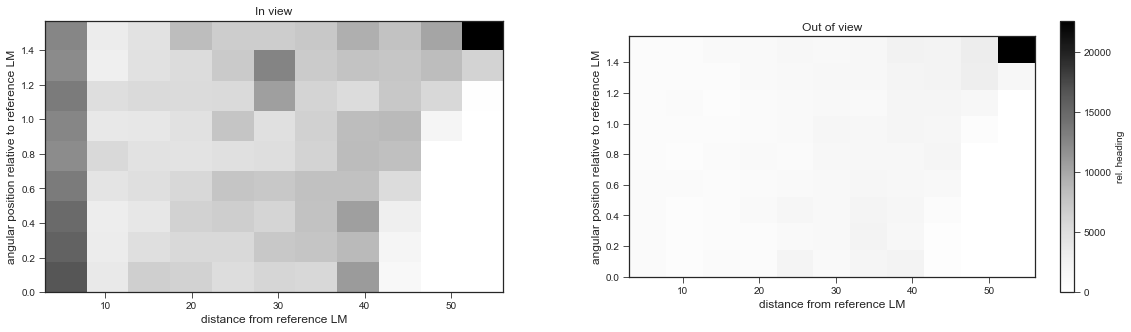

In [222]:
slct_in = np.logical_and(slct, abs(beta2) <= np.pi/2)
slct_out = np.logical_and(slct, abs(beta2) > np.pi/2)

map2dFig, ax = plt.subplots(1,2, figsize=(20,5))

H, xedg, yedg = np.histogram2d(gamma[slct_in],r[slct_in], bins=numBins, range=None)

#H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
map2d = ax[0].imshow(H, cmap='Greys', extent=extent, interpolation='None', 
                  origin='lower', aspect=20)
ax[0].set_xlabel('distance from reference LM', fontsize=12)
ax[0].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[0].set_title('In view')

H, xedg, yedg = np.histogram2d(gamma[slct_out],r[slct_out], bins=numBins, range=None)
map2d = ax[1].imshow(H, cmap='Greys', extent=extent, interpolation='None', 
                  origin='lower', aspect=20)
cb = plt.colorbar(map2d, label='rel. heading')
ax[1].set_xlabel('distance from reference LM', fontsize=12)
ax[1].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[1].set_title('Out of view')

/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


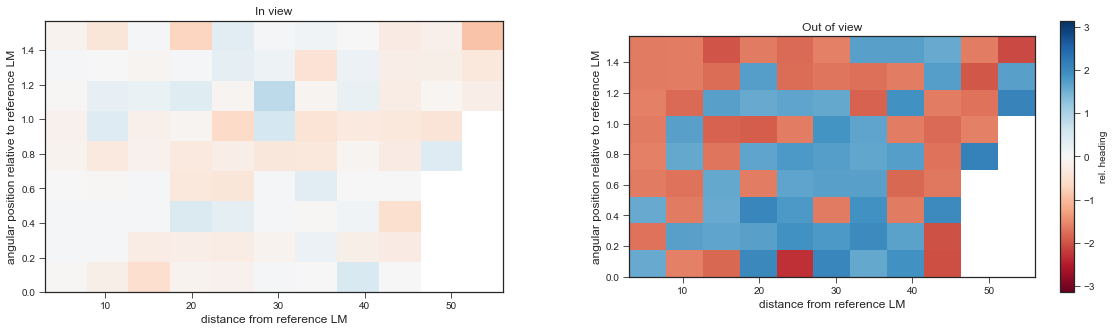

In [223]:
slct_in = np.logical_and(slct, abs(beta2) <= np.pi/2)
slct_out = np.logical_and(slct, abs(beta2) > np.pi/2)

map2dFig, ax = plt.subplots(1,2, figsize=(20,5))

meanbeta2, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[slct_in],r[slct_in], beta2[slct_in], 
                                        statistic=histStat, bins=numBins, range=None)
map2d = ax[0].imshow(meanbeta2, cmap='RdBu', extent=extent, interpolation='None', 
                  origin='lower', aspect=20, vmin=-np.pi, vmax=np.pi)
ax[0].set_xlabel('distance from reference LM', fontsize=12)
ax[0].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[0].set_title('In view')

meanbeta2, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[slct_out],r[slct_out], beta2[slct_out], 
                                        statistic=histStat, bins=numBins, range=None)
map2d = ax[1].imshow(meanbeta2, cmap='RdBu', extent=extent, interpolation='None', 
                  origin='lower', aspect=20, vmin=-np.pi, vmax=np.pi)
cb = plt.colorbar(map2d, label='rel. heading')
ax[1].set_xlabel('distance from reference LM', fontsize=12)
ax[1].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[1].set_title('Out of view')

/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


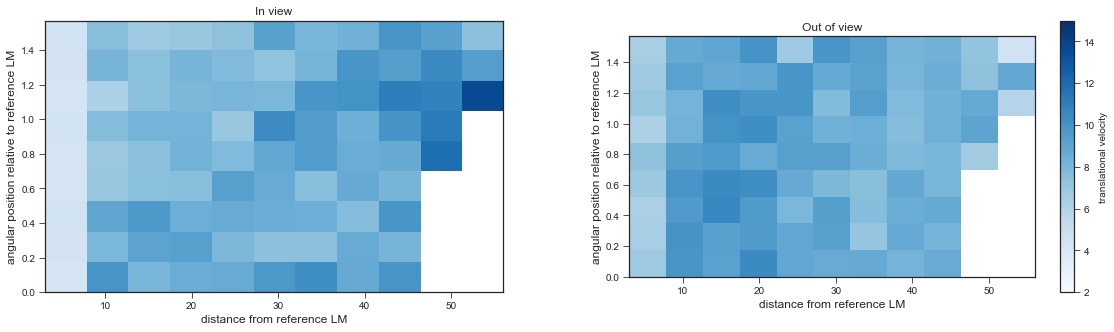

In [224]:
slct_mov = np.logical_and(slct, movTrial)
slct_in = np.logical_and(slct_mov, abs(beta2) <= np.pi/2)
slct_out = np.logical_and(slct_mov, abs(beta2) > np.pi/2)

map2dFig, ax = plt.subplots(1,2, figsize=(20,5))
                          
meanbeta2, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[slct_in],r[slct_in], 
                        vtTrial[slct_in], statistic=histStat, bins=numBins, range=None)

map2d = ax[0].imshow(meanbeta2, cmap='Blues', extent=extent, interpolation='None', origin='lower',
                  aspect=20,vmin=vTransTH, vmax=15)
ax[0].set_xlabel('distance from reference LM', fontsize=12)
ax[0].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[0].set_title('In view')

meanbeta2, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[slct_out],r[slct_out], 
                        vtTrial[slct_out], statistic=histStat, bins=numBins, range=None)

map2d = ax[1].imshow(meanbeta2, cmap='Blues', extent=extent, interpolation='None', origin='lower',
                  aspect=20,vmin=vTransTH, vmax=15)
cb = plt.colorbar(map2d, label='translational velocity')
ax[1].set_xlabel('distance from reference LM', fontsize=12)
ax[1].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[1].set_title('Out of view')

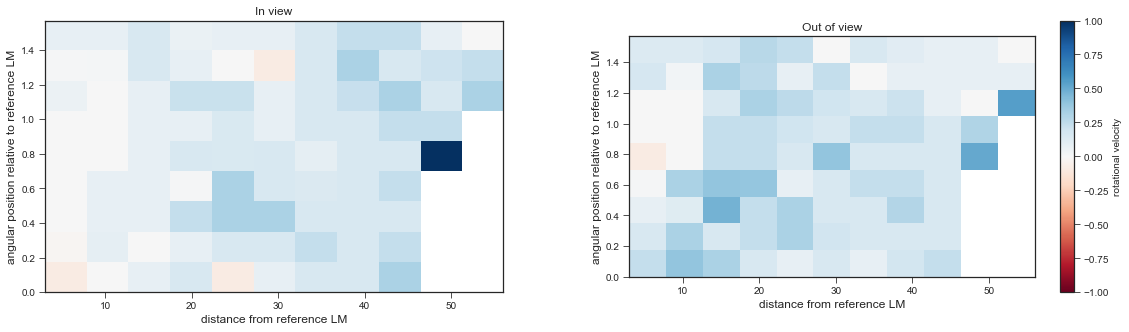

In [225]:
map2dFig, ax = plt.subplots(1,2, figsize=(20,5))
                          
meanbeta2, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[slct_in],r[slct_in], 
                        vrTrial[slct_in], statistic=histStat, bins=numBins, range=None)

map2d = ax[0].imshow(meanbeta2, cmap='RdBu', extent=extent, interpolation='None', origin='lower',
                  aspect=20,vmin=-1, vmax=1)
ax[0].set_xlabel('distance from reference LM', fontsize=12)
ax[0].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[0].set_title('In view')

meanbeta2, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[slct_out],r[slct_out], 
                        vrTrial[slct_out], statistic=histStat, bins=numBins, range=None)

map2d = ax[1].imshow(meanbeta2, cmap='RdBu', extent=extent, interpolation='None', origin='lower',
                  aspect=20,vmin=-1, vmax=1)
cb = plt.colorbar(map2d, label='rotational velocity')
ax[1].set_xlabel('distance from reference LM', fontsize=12)
ax[1].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[1].set_title('Out of view')                        

### (3) Find "reorientation events", defined as continuous periods of  diff(beta) < 0 or beta > 0 

In [226]:
def findzerocrossings(X):
    last_sign = 0
    eventStart = []
    eventEnd = []

    for ind, x in enumerate(X):
        currsign = np.sign(x)
        if not currsign == last_sign:
            eventStart.append(ind)
            eventEnd.append(ind-1)
            last_sign = currsign
    
    print len(eventEnd[1:])
    
    return np.asarray(eventStart[:-1]), np.asarray(eventEnd[1:])

In [227]:
beta2U = np.copy(beta2)
beta2U[~np.isnan(beta2)] = np.unwrap(beta2[~np.isnan(beta2)])

In [228]:
dbeta = np.hstack((0,np.diff(beta2U)));
dbeta[dbeta > np.pi/2] = np.nan * np.ones(len(dbeta[dbeta > np.pi/2]))
dbeta[dbeta < -np.pi/2] = np.nan * np.ones(len(dbeta[dbeta < -np.pi/2]))

/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


27


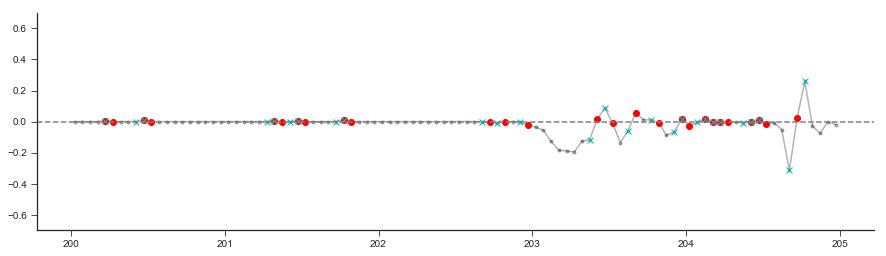

In [229]:
ts = 4000
te = 4100

evSt, evEd = findzerocrossings(dbeta[ts:te])

fig, axs = plt.subplots(1,1, figsize=(15,4))
axs.plot(timeTrial[ts:te],dbeta[ts:te], 'k.-', alpha=0.3)
axs.set_ylim(-0.7,0.7)
axs.plot(timeTrial[ts:te][evSt],dbeta[ts:te][evSt], 'ro')
axs.plot(timeTrial[ts:te][evEd],dbeta[ts:te][evEd], 'cx')
axs.axhline(y=0, color='grey', linestyle='dashed')
myAxisTheme(axs)

98781


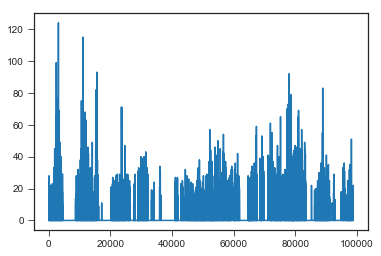

In [230]:
allevSt, allevEd = findzerocrossings(dbeta)
allROLength = allevEd - allevSt

plt.plot(allROLength);

In [231]:
minROLength = 10

evSt = allevSt[allROLength >= minROLength]
evEd = allevEd[allROLength >= minROLength]

# Reorientation event duration (∆t)
ROLength = timeTrial[evEd] - timeTrial[evSt]
tmp = ROLength<0
ROLength = ROLength[~tmp]
evSt = evSt[~tmp]
evEd = evEd[~tmp]

print(len(ROLength))
print((100.*len(ROLength))/len(allROLength))

4816
4.87543151011


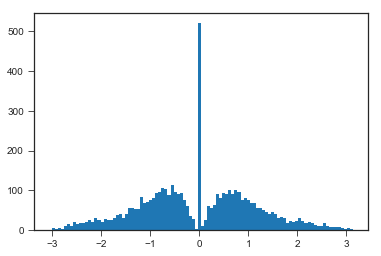

In [242]:
# Reorientation event effect (∆x)

ROEffect = beta2[evEd] - beta2[evSt]

ROEffect_abs = abs(ROEffect)%np.pi

ROEffect = abs(ROEffect)%np.pi * np.sign(ROEffect)

plt.hist(ROEffect,100);

In [286]:
r = norm_dirLM
rmin = 5
rmax = gridSize - 4
maxROLength = 1

numBins = (9,15)
histStat = 'mean'

slct = np.logical_and(r[evSt] > rmin, r[evSt] < rmax)

slct_FOV = np.logical_and(slct, abs(beta2[evSt]) <= np.pi/2)
slct_outFOV = np.logical_and(slct, abs(beta2[evSt]) > np.pi/2)

evSlct = evSt

print(len(gamma[evSlct][slct_FOV]))

2459


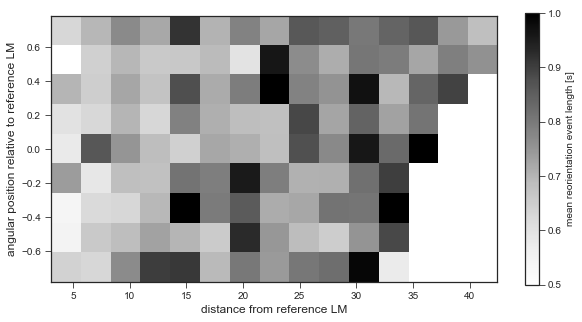

In [287]:
meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[evSlct][slct_FOV], r[evSlct][slct_FOV],
                                        ROLength[slct_FOV],statistic=histStat, bins=numBins, range=None)

map2dFig, ax = plt.subplots(1,1, figsize=(10,5))
map2d = ax.imshow(meanROLen, cmap='Greys', extent=extent, interpolation='None', origin='lower',
                  aspect=15,vmin=minROLength/20., vmax=maxROLength)
cb = plt.colorbar(map2d, label='mean reorientation event length [s]')
ax.set_xlabel('distance from reference LM', fontsize=12)
ax.set_ylabel('angular position relative to reference LM', fontsize=12)

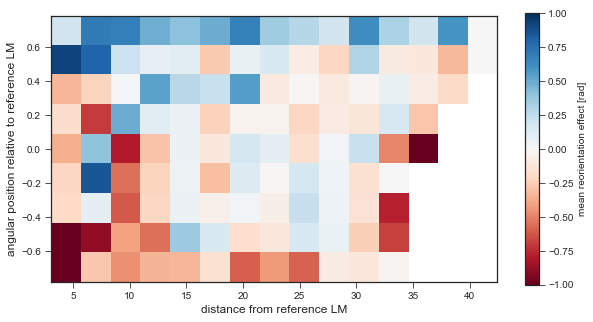

In [288]:
minROEff = -1
maxROEff = 1
   
meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[evSlct][slct_FOV], r[evSlct][slct_FOV],
                                        ROEffect[slct_FOV],statistic=histStat, bins=numBins, range=None)

map2dFig, ax = plt.subplots(1,1, figsize=(10,5))
map2d = ax.imshow(meanROLen, cmap='RdBu', extent=extent, interpolation='None', origin='lower',
                  aspect=15,vmin=minROEff, vmax=maxROEff)
cb = plt.colorbar(map2d, label='mean reorientation effect [rad]')
ax.set_xlabel('distance from reference LM', fontsize=12)
ax.set_ylabel('angular position relative to reference LM', fontsize=12)

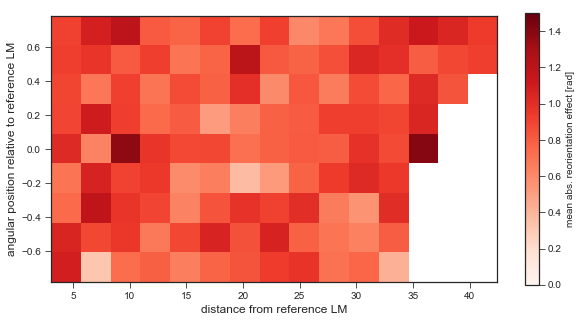

In [289]:
minROEff = 0
maxROEff = 1.5
   
meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma[evSlct][slct_FOV], r[evSlct][slct_FOV],
                                        ROEffect_abs[slct_FOV],statistic=histStat, bins=numBins, range=None)

map2dFig, ax = plt.subplots(1,1, figsize=(10,5))
map2d = ax.imshow(meanROLen, cmap='Reds', extent=extent, interpolation='None', origin='lower',
                  aspect=15,vmin=minROEff, vmax=maxROEff)
cb = plt.colorbar(map2d, label='mean abs. reorientation effect [rad]')
ax.set_xlabel('distance from reference LM', fontsize=12)
ax.set_ylabel('angular position relative to reference LM', fontsize=12)

### Use a different parameterisation of the triangle for making maps: origin in the center corner

In [237]:
coord_c = (gridSize/2, gridSize/2)

dir_c = np.vstack((np.ones(len(xt))*coord_c[0] - xt, np.ones(len(xt))*coord_c[1] - yt))
r_c = np.sqrt( np.square(dir_c[0]) + np.square(dir_c[1]) )

gamma_c = np.arctan2(dir_c[1], dir_c[0])

In [238]:
rmin = 3
rmax = np.sqrt(1.0/2)*gridSize

extent = [ rmin, rmax, -np.pi/4, np.pi/4]

numBins = (9,15)
histStat = 'mean'

evSlct = evEd

slct_all = np.logical_and(r_c >= rmin, r_c <= rmax)
slct = np.logical_and(r_c[evSlct] > rmin, r_c[evSlct] < rmax)

slct_in_all = np.logical_and(slct_all, abs(beta2) <= np.pi/2)
slct_out_all = np.logical_and(slct_all, abs(beta2) > np.pi/2)
slct_in = np.logical_and(slct, abs(beta2[evSlct]) <= np.pi/2)
slct_out = np.logical_and(slct, abs(beta2[evSlct]) > np.pi/2)

slct_mov = np.logical_and(slct_all, movTrial)



/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  
/Users/haberkernh/anaconda/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


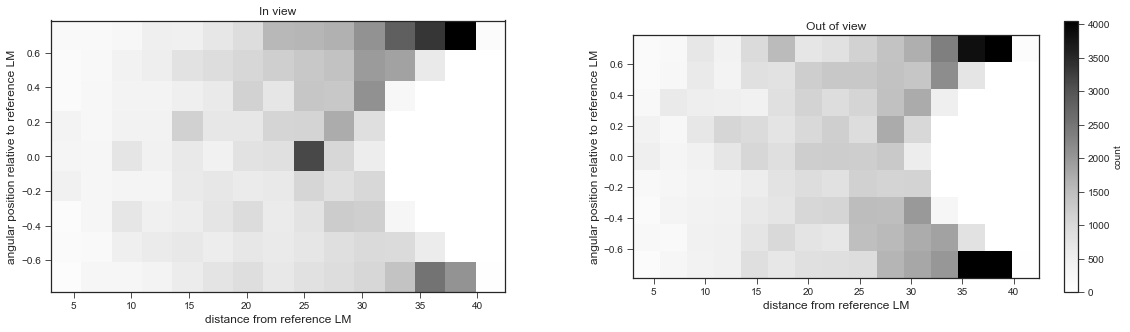

In [239]:
map2dFig, ax = plt.subplots(1,2, figsize=(20,5))

H, xedg, yedg = np.histogram2d(gamma_c[slct_in_all],r_c[slct_in_all], bins=numBins, range=None)

#H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
map2d = ax[0].imshow(H, cmap='Greys', extent=extent, interpolation='None', 
                  origin='lower', aspect=15, vmin=0, vmax=np.max(H)*0.2)
ax[0].set_xlabel('distance from reference LM', fontsize=12)
ax[0].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[0].set_title('In view')

H, xedg, yedg = np.histogram2d(gamma_c[slct_out_all],r_c[slct_out_all], bins=numBins, range=None)
map2d = ax[1].imshow(H, cmap='Greys', extent=extent, interpolation='None', 
                  origin='lower', aspect=15, vmin=0, vmax=np.max(H)*0.2)
cb = plt.colorbar(map2d, label='count')
ax[1].set_xlabel('distance from reference LM', fontsize=12)
ax[1].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[1].set_title('Out of view')

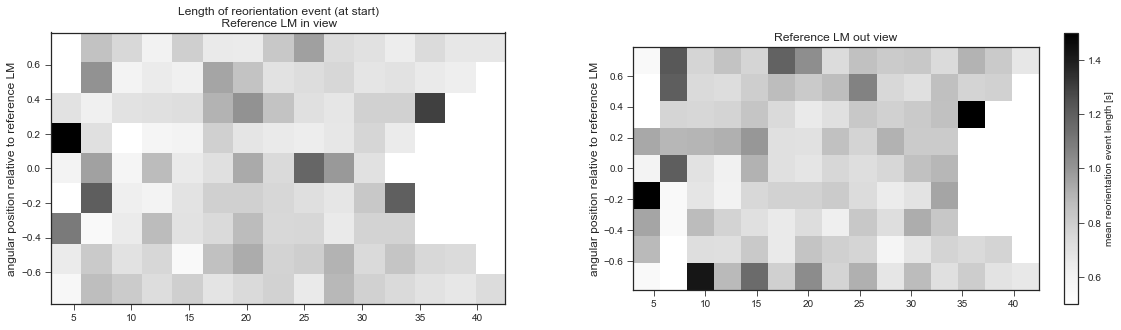

In [240]:
maxROLength = 1.5



map2dFig, ax = plt.subplots(1,2, figsize=(20,5))

evSlct = evSt

meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma_c[evSlct][slct_in], r_c[evSlct][slct_in],
                                        ROLength[slct_in],statistic=histStat, bins=numBins, range=None)

map2d = ax[0].imshow(meanROLen, cmap='Greys', extent=extent, interpolation='None', origin='lower',
                  aspect=15,vmin=minROLength/20., vmax=maxROLength)
ax[0].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[0].set_title('Length of reorientation event (at start)\n Reference LM in view', fontsize=12)


meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma_c[evSlct][slct_out], r_c[evSlct][slct_out],
                                        ROLength[slct_out],statistic=histStat, bins=numBins, range=None)

map2d = ax[1].imshow(meanROLen, cmap='Greys', extent=extent, interpolation='None', origin='lower',
                  aspect=15,vmin=minROLength/20., vmax=maxROLength)
ax[1].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[1].set_title('Reference LM out view', fontsize=12)
cb = plt.colorbar(map2d, label='mean reorientation event length [s]')


#evSlct = evEd
#
#meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma_c[evSlct][slct_in], r_c[evSlct][slct_in],
#                                        ROLength[slct_in],statistic=histStat, bins=numBins, range=None)

#map2d = ax[1,0].imshow(meanROLen, cmap='Greys', extent=extent, interpolation='None', origin='lower',
#                  aspect=15,vmin=minROLength/20., vmax=maxROLength)
#ax[1,0].set_xlabel('distance from reference LM', fontsize=12)
#ax[1,0].set_ylabel('angular position relative to reference LM', fontsize=12)
#ax[1,0].set_title('Length of reorientation event (at end)', fontsize=12)


#meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma_c[evSlct][slct_out], r_c[evSlct][slct_out],
#                                        ROLength[slct_out],statistic=histStat, bins=numBins, range=None)

#map2d = ax[1,1].imshow(meanROLen, cmap='Greys', extent=extent, interpolation='None', origin='lower',
#                  aspect=15,vmin=minROLength/20., vmax=maxROLength)
#cb = plt.colorbar(map2d, label='mean reorientation event length [s]')
#ax[1,1].set_xlabel('distance from reference LM', fontsize=12)
#ax[1,1].set_ylabel('angular position relative to reference LM', fontsize=12)




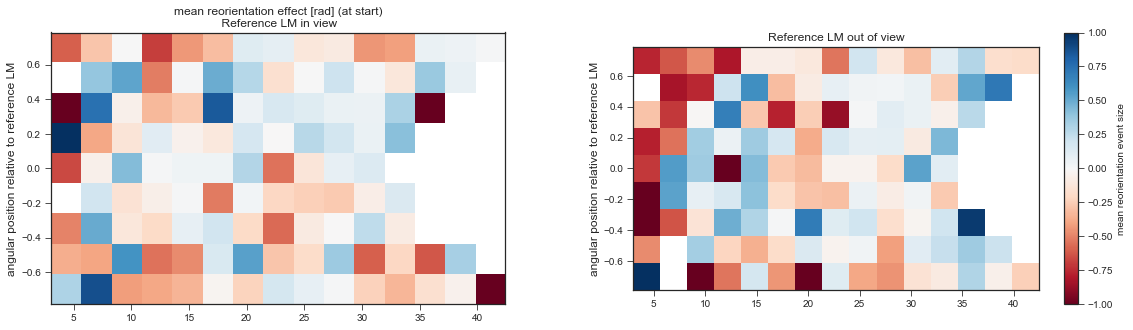

In [241]:
minROEff = -1
maxROEff = 1

interp = 'none'

map2dFig, ax = plt.subplots(1,2, figsize=(20,5))

evSlct = evSt

meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma_c[evSlct][slct_in], r_c[evSlct][slct_in],
                                        ROEffect[slct_in],statistic=histStat, bins=numBins, range=None)

map2d = ax[0].imshow(meanROLen, cmap='RdBu', extent=extent, interpolation=interp, origin='lower',
                  aspect=15,vmin=minROEff, vmax=maxROEff)
ax[0].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[0].set_title('mean reorientation effect [rad] (at start)\n Reference LM in view', fontsize=12)


meanROLen, xedg, yedg, binnum = sts.binned_statistic_2d(gamma_c[evSlct][slct_out], r_c[evSlct][slct_out],
                                        ROEffect[slct_out],statistic=histStat, bins=numBins, range=None)

map2d = ax[1].imshow(meanROLen, cmap='RdBu', extent=extent, interpolation=interp, origin='lower',
                  aspect=15,vmin=minROEff, vmax=maxROEff)
ax[1].set_ylabel('angular position relative to reference LM', fontsize=12)
ax[1].set_title('Reference LM out of view', fontsize=12)
cb = plt.colorbar(map2d, label='mean reorientation event size')